In [78]:
from statsmodels.regression.dimred import SIR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.gam.api import GLMGam, BSplines
import statsmodels.api as sm
from matplotlib.backends.backend_pdf import PdfPages
from read import *
import patsy
import os

In [79]:
pa = "/Users/alex/Desktop/umich/stats504/memo4"

fn = ["DEMO_J.csv.gz", "BMX_J.csv.gz", "BPX_J.csv.gz"]

da = []
for f in fn:
    dx = pd.read_csv(os.path.join(pa, f))
    da.append(dx)

df = pd.merge(da[0], da[1], how="left", on="SEQN")
df = pd.merge(df, da[2], how="left", on="SEQN")

df['RIAGENDR'] = df['RIAGENDR'].replace([1,2],[-0.515,0.485])
df["RIDRETH1"] = df["RIDRETH1"].replace([1, 2, 3, 4, 5], ["MA", "OH", "NHW", "NHB", "Other"])

df = df.loc[df.RIDAGEYR >= 18, :]

In [80]:
f9 = "BPXSY1 ~ bs(RIDAGEYR, 6) * BMXBMI * RIAGENDR"
m9 = sm.OLS.from_formula(f9, df)
r9 = m9.fit()

In [81]:
dp = df.iloc[0:50, :].copy()
dp["RIDAGEYR"] = np.linspace(18, 80, 50)

In [82]:
import matplotlib
import matplotlib.pyplot as plt
cm = matplotlib.cm.get_cmap("tab10")
def plot1(rr, ii, dbands=False, bmi=2):
    sigma = np.sqrt(rr.scale)
    plt.figure(figsize=(7.6, 5))
    plt.clf()
    plt.axes([0.12, 0.12, 0.7, 0.8])
    plt.grid(True)
    for (jj,sex) in enumerate([0.485, -0.515]):
        dp["RIAGENDR"] = sex
        dp["BMXBMI"] = bmi
        yh = rr.predict(exog=dp)
        plt.plot(dp.RIDAGEYR, yh, color=cm(jj/10), label={0.485: "Female", -0.515: "Male"}[sex])
        if dbands:
            plt.plot(dp.RIDAGEYR, yh + sigma, ":", color=cm(jj/10))
            plt.plot(dp.RIDAGEYR, yh - sigma, ":", color=cm(jj/10))
    plt.xlabel("Age", size=15)
    plt.ylabel("SBP", size=15)
    plt.title("Model %d" % ii)
    ha, lb = plt.gca().get_legend_handles_labels()
    leg = plt.figlegend(ha, lb, loc="center right")
    leg.draw_frame(False)

/var/folders/81/fr266crd1kq7t91jpmw9n7qm0000gn/T/ipykernel_52896/1518443966.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap("tab10")


In [72]:
def plot2(rr, ii, bmis = [25, 30]):
    plt.figure(figsize=(7.6, 5))
    plt.clf()
    plt.axes([0.12, 0.12, 0.7, 0.8])
    plt.grid(True)
    for sex in [0.485, -0.515]:
        for bmi in bmis:
            dp["RIAGENDR"] = sex
            dp["BMXBMI"] = bmi
            yh = rr.predict(exog=dp)
            plt.plot(dp.RIDAGEYR, yh, label="%s/%.0f" %
                     ({0.485: "Female", -0.515: "Male"}[sex], bmi))
    plt.xlabel("Age", size=15)
    plt.ylabel("SBP", size=15)
    plt.title("Model %d" % ii)
    ha, lb = plt.gca().get_legend_handles_labels()
    leg = plt.figlegend(ha, lb, loc="center right")
    leg.draw_frame(False)
    leg.set_title("Sex/BMI")

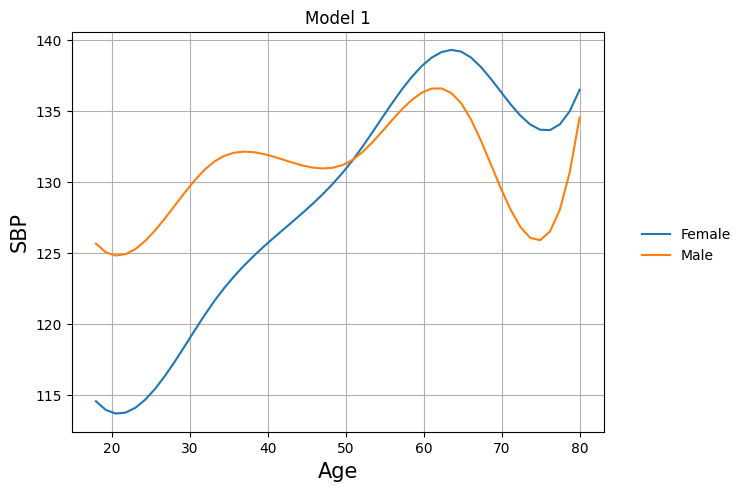

In [83]:
plot1(r9,1,False,45)

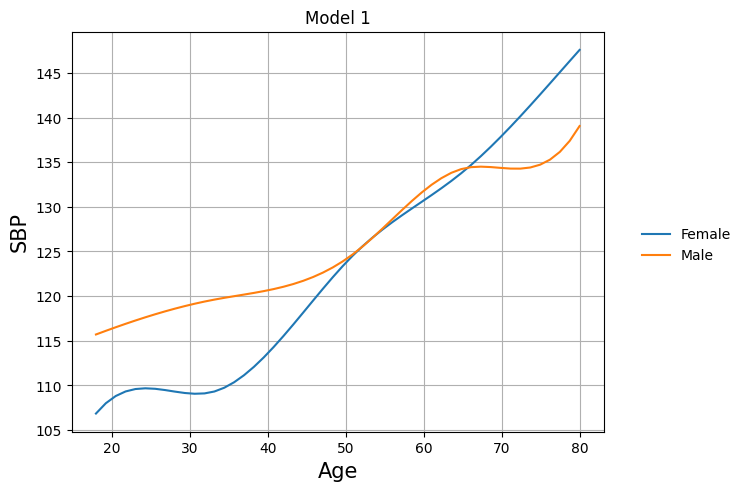

In [84]:
plot1(r9,1,False,27)

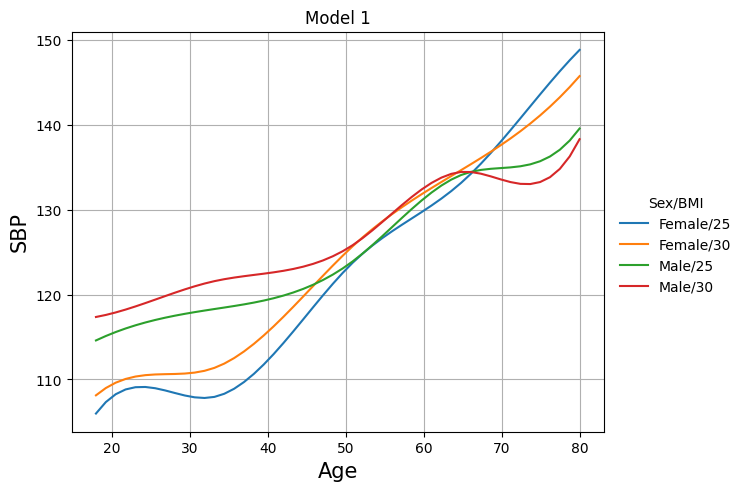

In [85]:
plot2(r9,1)

In [74]:
cm = matplotlib.cm.get_cmap("tab10")
def plot3(rr, ii, dbands=False, age=20):
    sigma = np.sqrt(rr.scale)
    plt.figure(figsize=(7.6, 5))
    plt.clf()
    plt.axes([0.12, 0.12, 0.7, 0.8])
    plt.grid(True)
    for (jj,sex) in enumerate([0.485, -0.515]):
        dp["RIAGENDR"] = sex
        dp["RIDAGEYR"] = age
        yh = rr.predict(exog=dp)
        plt.plot(dp.BMXBMI, yh, color=cm(jj/10), label={0.485: "Female", -0.515: "Male"}[sex])
        if dbands:
            plt.plot(dp.BMXBMI, yh + sigma, ":", color=cm(jj/10))
            plt.plot(dp.BMXBMI, yh - sigma, ":", color=cm(jj/10))
    plt.xlabel("BMI", size=15)
    plt.ylabel("SBP", size=15)
    plt.title("Model %d" % ii)
    ha, lb = plt.gca().get_legend_handles_labels()
    leg = plt.figlegend(ha, lb, loc="center right")
    leg.draw_frame(False)



/var/folders/81/fr266crd1kq7t91jpmw9n7qm0000gn/T/ipykernel_52896/2484970910.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap("tab10")


In [58]:
r9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     77.13
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:26:07   Log-Likelihood:                -20334.
No. Observations:                4833   AIC:                         4.072e+04
Df Residuals:                    4805   BIC:                         4.091e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             97.9414      4.302     22.766      0.000      89.507     106.375
bs(RIDAGEYR, 6)[0]                    13.6159      8.685      1.568      0.117      -3.412      30.643
bs(RIDAGEYR, 6)[1]                   -15.6260      7.027     -2.224      0.026     -29.403      -1.849
bs(RIDAGEYR, 6)[2]                    20.5836      7.956      2.587      0.010       4.986      36.182
bs(RIDAGEYR, 6)[3]                    22.8438      7.545      3.028      0.002       8.052      37.636
bs(RIDAGEYR, 6)[4]                    60.6440      9.421      6.437      0.000      42.174      79.114
bs(RIDAGEYR, 6)[5]                    57.3765      6.308      9.095      0.000      45.009      69.744
BMXBMI                                 0.4889      0.157      3.108      0.002       0.181       0.797
bs(RIDAGEYR, 6)[0]:BMXBMI             -0.3736      0.304     -1.230      0.219      -0.969       0.222
bs(RIDAGEYR, 6)[1]:BMXBMI              0.5965      0.235      2.536      0.011       0.135       1.058
bs(RIDAGEYR, 6)[2]:BMXBMI             -0.2997      0.270     -1.108      0.268      -0.830       0.231
bs(RIDAGEYR, 6)[3]:BMXBMI              0.0632      0.255      0.248      0.804      -0.437       0.563
bs(RIDAGEYR, 6)[4]:BMXBMI             -1.2775      0.320     -3.991      0.000      -1.905      -0.650
bs(RIDAGEYR, 6)[5]:BMXBMI             -0.9287      0.226     -4.101      0.000      -1.373      -0.485
RIAGENDR                              -5.5176      8.617     -0.640      0.522     -22.410      11.375
bs(RIDAGEYR, 6)[0]:RIAGENDR            9.1527     17.425      0.525      0.599     -25.008      43.314
bs(RIDAGEYR, 6)[1]:RIAGENDR          -18.6617     14.134     -1.320      0.187     -46.371       9.048
bs(RIDAGEYR, 6)[2]:RIAGENDR           15.4455     15.999      0.965      0.334     -15.919      46.810
bs(RIDAGEYR, 6)[3]:RIAGENDR          -11.4994     15.143     -0.759      0.448     -41.187      18.189
bs(RIDAGEYR, 6)[4]:RIAGENDR           14.3760     18.865      0.762      0.446     -22.608      51.360
bs(RIDAGEYR, 6)[5]:RIAGENDR           23.9048     12.662      1.888      0.059      -0.919      48.729
BMXBMI:RIAGENDR                       -0.1236      0.315     -0.392      0.695      -0.741       0.494
bs(RIDAGEYR, 6)[0]:BMXBMI:RIAGENDR    -0.2030      0.610     -0.333      0.739      -1.398       0.992
bs(RIDAGEYR, 6)[1]:BMXBMI:RIAGENDR     0.3855      0.473      0.814      0.415      -0.542       1.313
bs(RIDAGEYR, 6)[2]:BMXBMI:RIAGENDR    -0.0470      0.544     -0.086      0.931      -1.113       1.019
bs(RIDAGEYR, 6)[3]:BMXBMI:RIAGENDR     0.5172      0.512      1.010      0.312      -0.486       1.521
bs(RIDAGEYR, 6)[4]:BMXBMI:RIAGENDR     0.2067      0.641      0.322      0.747      -1.051      